### Pre - Processing

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from google.colab import files
uploaded = files.upload()

Saving test_data.txt to test_data.txt


In [4]:
test_data = np.loadtxt('/content/test_data.txt',delimiter=',',dtype=float)
test_data

array([[ 1. ,  1. ],
       [ 1. , -1. ],
       [ 4. ,  5. ],
       [-2. ,  2.5],
       [ 0. ,  2. ],
       [ 2. , -3. ]])

In [5]:
# Given data

mean_one = np.array([0,0])
mean_two = np.array([2,2])
sigma_one = np.array([[.25,.3], [.3,1]])
sigma_two = np.array([[.5,0], [0,.5]])
prior_one = 0.5
prior_two = 0.5

### TASK - 1 

In [6]:
# NORNMAL DISTRIBUTION
def NormalDistribution(x, mu, sigma):
  D = len(mu)
  a = (1.0/(np.sqrt(((2*np.pi)**D)*np.linalg.det(sigma)))) * np.exp(-0.5*(np.dot(np.dot(np.transpose(x-mu),np.linalg.inv(sigma)),(x-mu))))
  return a


In [7]:
def normal_distribution(x, mu, sigma):  
    D = len(mu)   
    
    a1 = (2 * np.pi)**D         # (2pie)^D
    a2 = np.linalg.det(sigma)   # |cov|
    a3 = 1.0 / np.sqrt(a1 * a2)  

    a4 = np.transpose(x - mu)  #(x-mu)^T
    a5 = np.linalg.inv(sigma)  # covariance^-1
    a6 = (x - mu)              # (x-mu)
    a7=np.dot(a4,a5)
    a8 = -0.5 * (np.dot(a7,a6))           

    a = a3 * np.exp(a8)  


    return a 

In [8]:
x1 = []
x2 = []
y1 = []
y2 = []

for idx in test_data:
  x = np.array([idx[0],idx[1]])
  likelihood_one = NormalDistribution(x, mean_one, sigma_one)
  likelihood_two = NormalDistribution(x, mean_two, sigma_two)
  posterior_one = likelihood_one * prior_one
  posterior_two = likelihood_two * prior_two

  if (posterior_one > posterior_two): 
    print('class - 1 == ', x)
    x1.append(x[0])
    y1.append(x[1])
  else:
    print('class - 2 == ', x)
    x2.append(x[1])
    y2.append(x[1])

class - 1 ==  [1. 1.]
class - 1 ==  [ 1. -1.]
class - 2 ==  [4. 5.]
class - 2 ==  [-2.   2.5]
class - 1 ==  [0. 2.]
class - 2 ==  [ 2. -3.]


### TASK - 2

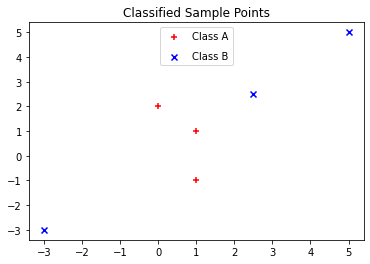

In [9]:
fig, ax = plt.subplots(1,1,squeeze=True)
plt.title('Classified Sample Points')
ax.scatter(x1,y1,marker='+',color='r',label='Class A')
ax.scatter(x2,y2,marker='x',color='b',label='Class B')
legend = ax.legend(loc='upper center', shadow=False, fontsize='medium',labelspacing=1)
legend.get_frame().set_facecolor('None')
plt.show()

### TASK - 3

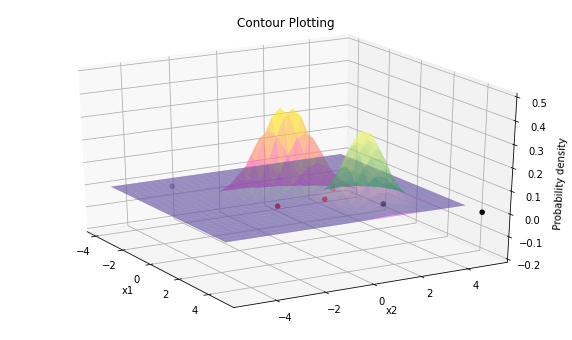

In [14]:
X = np.linspace(-4, 4, 30)
Y = np.linspace(-5, 5,30)

X,Y = np.meshgrid(X,Y) # (vector to matrix)

data = np.empty(X.shape + (2,)) # X Y into a single 3D array

data[:, :, 0] = X
data[:, :, 1] = Y

def Distribution_3D(data, mu, sigma):
    D = mu.shape[0]
    a1 = np.linalg.det(sigma)
    a2 = np.linalg.inv(sigma)
    a3 = np.sqrt((2*np.pi)**D * a1)
    a4= np.einsum('...a,ab,...b->...', data-mu, a2, data-mu) 
    a5= -0.5*a4
    a6 = np.exp(a5) 
    a7 = a6 / a3
    return a7

Z1 = Distribution_3D(data, mean_one, sigma_one)
Z2 = Distribution_3D(data, mean_two, sigma_two)


fig = plt.figure()
ax = fig.gca(projection='3d')

fig.set_figheight(6)
fig.set_figwidth(10)
ax.scatter(x1, y1, 0,color='red')
ax.scatter(x2, y2, 0,color='black')

ax.plot_surface(X, Y, Z1, rstride=1, cstride=1, linewidth=1, antialiased=True,cmap=cm.spring,alpha=.4)
ax.plot_surface(X, Y, Z2, rstride=1, cstride=1, linewidth=1, antialiased=True,cmap=cm.summer,alpha=.4)

ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('Probability density')
ax.set_title('Contour Plotting')

ax.set_zlim(-0.2,0.3)
ax.set_zticks(np.linspace(-0.2,0.5,8))
ax.view_init(25, -30)
plt.show()


### TASK - 4

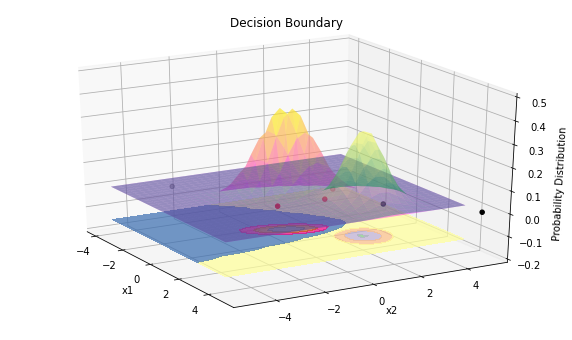

In [15]:
fig = plt.figure()
ax = fig.gca(projection='3d')

fig.set_figheight(6)
fig.set_figwidth(10)
ax.scatter(x1, y1, 0,color='red')
ax.scatter(x2, y2, 0,color='black')

ax.plot_surface(X, Y, Z1, rstride=1, cstride=1, linewidth=1, antialiased=True,cmap=cm.spring,alpha=.4)
ax.plot_surface(X, Y, Z2, rstride=1, cstride=1, linewidth=1, antialiased=True,cmap=cm.summer,alpha=.4)

dcsn = Z1 - Z2
ax.contourf(X,Y,dcsn,zdir='z', offset=-0.15, cmap=cm.Accent,alpha=0.7)

ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('Probability Distribution')
ax.set_title('Decision Boundary')

ax.set_zlim(-0.2,0.3)
ax.set_zticks(np.linspace(-0.2,0.5,8))
ax.view_init(25, -30)
plt.show()
